In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import keras

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [2]:
df=pd.read_csv("FGData.csv",nrows=2076) #Taking first 2076 rows since they have more meaningful data

In [3]:
df.head()

,Date,Hour,Minute,M1voltage,M1current,M1power,M1energy,M1waterconsumptionpm,M2voltage,M2current,...,M3energy,M3waterconsumptionpm,Temp,Humid,Windspeed,Winddirec,Rainfall,Pressure,Radiation,Pm2.5
0,13/05/15,0,1,230.127566,0.0,0.0,0.296908,0,230.580605,0.0,...,0.096054,0.0,20.222222,93,0,33,0.28,27.963,0,49.6
1,13/05/15,0,3,230.145109,0.0,0.0,0.296908,0,230.605005,0.0,...,0.096054,0.0,20.222222,94,0,33,0.28,27.963,0,49.6
2,13/05/15,0,4,230.156163,0.0,0.0,0.296908,0,230.608336,0.0,...,0.096054,0.0,20.222222,94,0,33,0.28,27.966,0,49.6
3,13/05/15,0,5,230.154073,0.0,0.0,0.296908,0,230.603044,0.0,...,0.096054,0.0,20.222222,94,0,33,0.28,27.965,0,49.6
4,13/05/15,0,6,230.187417,0.0,0.0,0.296908,0,230.645034,0.0,...,0.096054,0.0,20.222222,94,0,33,0.28,27.966,0,49.6


In [4]:
cdf = df[['M1voltage','M1energy','M2voltage','M2energy','M3voltage','M3energy','Humid','Temp','Pressure','Pm2.5']]
cdf.head(10000)

,M1voltage,M1energy,M2voltage,M2energy,M3voltage,M3energy,Humid,Temp,Pressure,Pm2.5
0,230.127566,0.296908,230.580605,2.484218,230.052971,0.096054,93,20.222222,27.963,49.6
1,230.145109,0.296908,230.605005,2.484218,230.084771,0.096054,94,20.222222,27.963,49.6
2,230.156163,0.296908,230.608336,2.484218,230.085489,0.096054,94,20.222222,27.966,49.6
3,230.154073,0.296908,230.603044,2.484218,230.080393,0.096054,94,20.222222,27.965,49.6
4,230.187417,0.296908,230.645034,2.484218,230.316635,0.096054,94,20.222222,27.966,49.6
...,...,...,...,...,...,...,...,...,...,...
2071,231.227227,0.489409,231.879227,4.687044,231.156506,0.251474,76,27.666667,27.983,49.6
2072,231.584082,0.489409,231.879227,4.687044,231.476602,0.251474,73,27.722222,27.983,49.6
2073,231.370748,0.489409,231.879227,4.687044,231.262773,0.251474,74,27.611111,27.983,49.6
2074,231.406247,0.489409,231.879227,4.687044,231.316028,0.251474,74,27.666667,27.981,49.6


In [5]:
cdf.dropna()

,M1voltage,M1energy,M2voltage,M2energy,M3voltage,M3energy,Humid,Temp,Pressure,Pm2.5
0,230.127566,0.296908,230.580605,2.484218,230.052971,0.096054,93,20.222222,27.963,49.6
1,230.145109,0.296908,230.605005,2.484218,230.084771,0.096054,94,20.222222,27.963,49.6
2,230.156163,0.296908,230.608336,2.484218,230.085489,0.096054,94,20.222222,27.966,49.6
3,230.154073,0.296908,230.603044,2.484218,230.080393,0.096054,94,20.222222,27.965,49.6
4,230.187417,0.296908,230.645034,2.484218,230.316635,0.096054,94,20.222222,27.966,49.6
...,...,...,...,...,...,...,...,...,...,...
2071,231.227227,0.489409,231.879227,4.687044,231.156506,0.251474,76,27.666667,27.983,49.6
2072,231.584082,0.489409,231.879227,4.687044,231.476602,0.251474,73,27.722222,27.983,49.6
2073,231.370748,0.489409,231.879227,4.687044,231.262773,0.251474,74,27.611111,27.983,49.6
2074,231.406247,0.489409,231.879227,4.687044,231.316028,0.251474,74,27.666667,27.981,49.6


In [6]:
cdf.dtypes

M1voltage    float64
M1energy     float64
M2voltage    float64
M2energy     float64
M3voltage    float64
M3energy     float64
Humid          int64
Temp         float64
Pressure     float64
Pm2.5        float64
dtype: object

In [7]:
cdf.describe()

,M1voltage,M1energy,M2voltage,M2energy,M3voltage,M3energy,Humid,Temp,Pressure,Pm2.5
count,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000
mean,230.656836,0.375823,231.456139,3.453680,230.693527,0.162937,90.920520,22.919744,27.957587,49.600048
std,5.127949,0.084839,0.772691,0.928086,0.803388,0.064350,5.004378,1.718580,0.034008,0.002195
min,0.000000,0.000000,229.400251,1.556426,228.976638,0.096054,73.000000,19.611111,27.882000,49.600000
25%,230.126699,0.299522,230.839715,2.634063,230.054124,0.115915,89.000000,22.722222,27.938000,49.600000
50%,230.668182,0.321866,231.802608,3.026289,230.587719,0.119838,92.000000,23.000000,27.957000,49.600000
75%,231.214924,0.489409,231.879227,4.687044,231.133123,0.250149,94.000000,23.555556,27.984000,49.600000
max,233.480226,0.489409,233.945350,4.687044,233.397394,0.291953,97.000000,28.222222,28.023000,49.700000


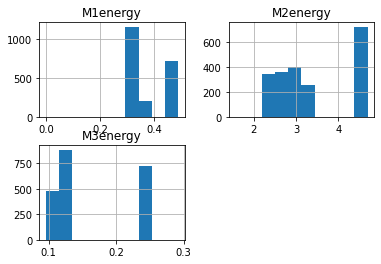

In [8]:
#Plotting the features: 
viz = cdf[['M1energy','M2energy','M3energy']]
viz.hist() #Histogram
plt.show()

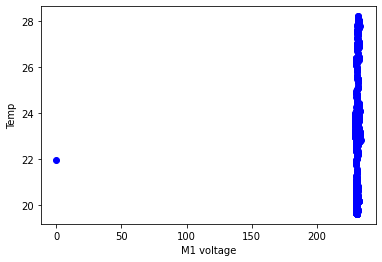

In [9]:
#Plot emmission vs engine size:
plt.scatter(cdf.M1voltage, cdf.Temp,  color='blue')
plt.xlabel("M1 voltage")
plt.ylabel("Temp")
plt.show()

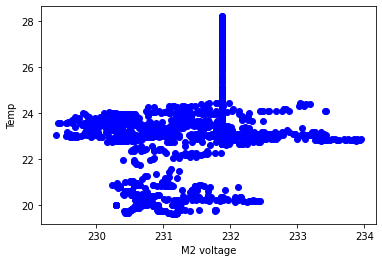

In [10]:
#Plot emmission vs engine size:
plt.scatter(cdf.M2voltage, cdf.Temp,  color='blue')
plt.xlabel("M2 voltage")
plt.ylabel("Temp")
plt.show()

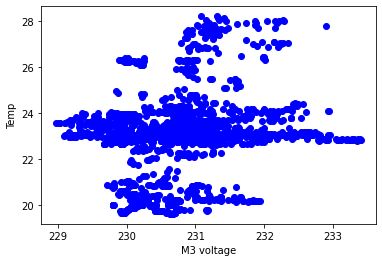

In [11]:
#Plot emmission vs engine size:
plt.scatter(cdf.M3voltage, cdf.Temp,  color='blue')
plt.xlabel("M3 voltage")
plt.ylabel("Temp")
plt.show()

In [12]:
#Changing pandas dataframe into np arrays:
X = cdf.iloc[:,0:5].values
temppred = cdf.iloc[:,7].values

In [13]:
X


array([[230.127566,   0.296908, 230.580605,   2.484218, 230.052971],
       [230.145109,   0.296908, 230.605005,   2.484218, 230.084771],
       [230.156163,   0.296908, 230.608336,   2.484218, 230.085489],
       ...,
       [231.370748,   0.489409, 231.879227,   4.687044, 231.262773],
       [231.406247,   0.489409, 231.879227,   4.687044, 231.316028],
       [  0.      ,   0.      , 230.402784,   1.556426, 230.321457]])

In [14]:
temppred

array([20.222222, 20.222222, 20.222222, ..., 27.611111, 27.666667,
       21.944444])

In [15]:
#Normalizing data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [16]:
X


array([[ -0.10323762,  -0.93039287,  -1.13337109,  -1.04483339,
         -0.79750978],
       [ -0.09981574,  -0.93039287,  -1.10178551,  -1.04483339,
         -0.75791788],
       [ -0.09765958,  -0.93039287,  -1.09747356,  -1.04483339,
         -0.75702395],
       ...,
       [  0.13925341,   1.33916459,   0.54768323,   1.32925245,
          0.70872781],
       [  0.14617773,   1.33916459,   0.54768323,   1.32925245,
          0.77503179],
       [-44.9911706 ,  -4.43089295,  -1.36355875,  -2.04475705,
         -0.46323714]])

In [17]:
#Train vs test 80:20
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [18]:
#Model:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X,temppred)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 0.4884106  -9.51737073 -1.22851306 10.95318208  0.96280202]


In [19]:
#y_hat= regr.predict(test[['M1voltage','M1energy','M2voltage','M2energy','M3voltage','M3energy','Humid','Temp']])
#x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
#y = np.asanyarray(test[['CO2EMISSIONS']])
#print("Residual sum of squares: %.2f"
#      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, temppred))

Variance score: 0.61


In [20]:
pressurepred = cdf.iloc[:,8].values
humidpred=cdf.iloc[:,6].values

In [21]:
#Model:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X,pressurepred)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [-0.00739859  0.14684738 -0.01585093 -0.12122334  0.01782286]


In [22]:
print('Variance score: %.2f' % regr.score(X, pressurepred))

Variance score: 0.40


In [23]:
#Model:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X,humidpred)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [-0.01357357 -1.51767758  3.57056005 -0.59912415 -3.21059405]


In [24]:
print('Variance score: %.2f' % regr.score(X, humidpred))

Variance score: 0.12


In [25]:
#SVR (State Vector Regression)

In [26]:
from sklearn.svm import SVR

In [27]:
regressor = SVR(kernel='rbf')
regressor.fit(X,temppred)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
regressor.score(X,temppred)

0.6236353905686816

In [29]:
#regressor.predict([[a,b,c,d,e,f]])----> Store value for temp, humidity, pressure -----> Predict whether safe to go out

In [30]:
#Multi Layer Perceptron

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
 clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [33]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [34]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

In [35]:
#Initializing the MLPClassifier
regx = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [36]:
from sklearn import svm

In [37]:
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

In [38]:
from sklearn.linear_model import BayesianRidge,ARDRegression,PassiveAggressiveRegressor,LinearRegression

In [39]:
regressor = BayesianRidge()
regressor.fit(X,temppred)
regressor.score(X,temppred)

0.6093488407193335

In [41]:

regressor =ARDRegression()
regressor.fit(X,temppred)
regressor.score(X,temppred)


0.6093500808399235

In [42]:
regressor =PassiveAggressiveRegressor()
regressor.fit(X,temppred)
regressor.score(X,temppred)

0.19390072166848737

In [43]:
regressor =LinearRegression()
regressor.fit(X,temppred)
regressor.score(X,temppred)

0.609353308434625